# SSB API: Lag eget datasett - http POST eksempel

### Eksempel på hvordan benytte PxWebApi og det anbefalte utformatet JSON-stat 
Her vises datasettet Eksport av laks med figurverktøyet Matplotlib


Biblioteket *[pyjstat](https://pypi.org/project/pyjstat/)* er laget for for JSON-stat formatet, og inkluderer også biblioteket Pandas as pd

In [1]:
from pyjstat import pyjstat

Requests benyttes for http kommunikasjon

In [2]:
import requests

URL spørringen skal postes mot. Selve URL-en vi kun gi metadata for tabellen. Her er tabellen eksport av laks

In [3]:
API_URL = 'https://data.ssb.no/api/v0/no/table/03024'

JSON Spørring, siste 53 uker. Kan tas fra [konsoll](https://data.ssb.no/api/v0/no/console "PxWebApi konsoll").

In [4]:
payload = {
    "query": [
        {
            "code": "VareGrupper2",
            "selection": {
                "filter": "item",
                "values": ["01","02"]
            }
        },
        {
            "code": "ContentsCode",
            "selection": {
                "filter": "item",
                "values": ["Vekt", "Kilopris"]
            }
        },
        {
            "code": "Tid",
            "selection": {
                "filter": "top",
                "values": ["53"]
            }
        }
    ],
    "response": {
        "format": "json-stat2"
    }
}

payload spørringen postes

In [5]:
resultat = requests.post(API_URL, json = payload)

Print av resultat gir bare http statuskode. Den skal være 200 hvis OK

In [6]:
print(resultat)

<Response [200]>


Resten av resultatet legges i objektet dataset

In [7]:
dataset = pyjstat.Dataset.read(resultat.text)

In [8]:
type(dataset)

pyjstat.pyjstat.Dataset

Datasettet skrives til en Pandas dataframe. 

In [9]:
df = dataset.write('dataframe')

Informasjon om dataframe 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   varegruppe          212 non-null    object 
 1   statistikkvariabel  212 non-null    object 
 2   uke                 212 non-null    object 
 3   value               212 non-null    float64
dtypes: float64(1), object(3)
memory usage: 6.8+ KB


In [11]:
df.head()

,varegruppe,statistikkvariabel,uke,value
0,Fersk oppalen laks,Vekt (tonn),2023U46,24833.0
1,Fersk oppalen laks,Vekt (tonn),2023U47,22141.0
2,Fersk oppalen laks,Vekt (tonn),2023U48,22910.0
3,Fersk oppalen laks,Vekt (tonn),2023U49,22243.0
4,Fersk oppalen laks,Vekt (tonn),2023U50,24551.0


In [12]:
df.tail(2)

,varegruppe,statistikkvariabel,uke,value
210,Frosen oppalen laks,Kilopris (kr),2024U45,78.44
211,Frosen oppalen laks,Kilopris (kr),2024U46,83.02


Benytter plotmuligheten i Pandas. Et ikke helt vellykket plot - *hvorfor*?

<Axes: xlabel='uke'>

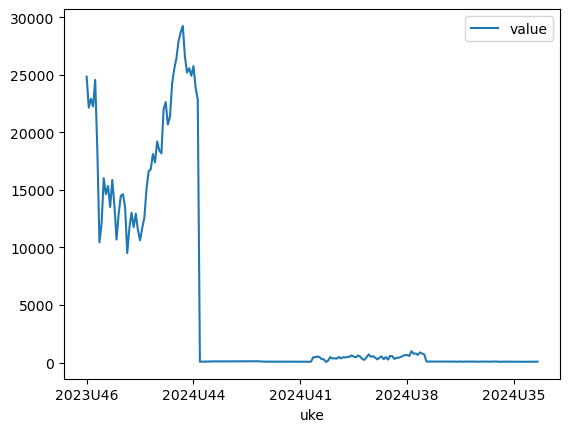

In [13]:
df.plot(x='uke', y='value')

lager en dataframe med bare priser (og ikke mengde/vekt)

In [14]:
df_pris = df[df['statistikkvariabel'] == 'Kilopris (kr)']


Det er to varegrupper fersk og frossen. Lager to plot med groupby 

varegruppe
Fersk oppalen laks     Axes(0.125,0.11;0.775x0.77)
Frosen oppalen laks    Axes(0.125,0.11;0.775x0.77)
dtype: object

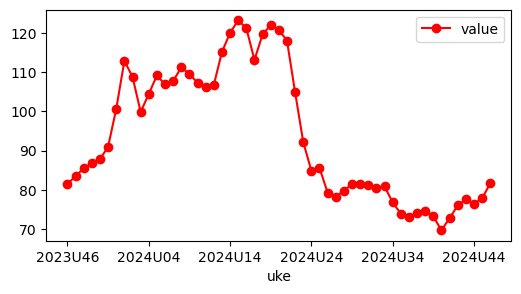

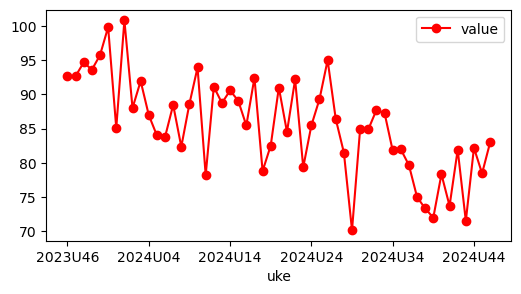

In [15]:
df_pris.groupby('varegruppe').plot(x='uke', y='value', marker="o", color="r", figsize=(6,3))

Lager en dataframe med kun pris på fersk laks

In [16]:
df_fersk = df_pris[df_pris['varegruppe'] == 'Fersk oppalen laks']

<Axes: title={'center': 'Pris pr kilo, Fersk oppdrettslaks'}, xlabel='uke'>

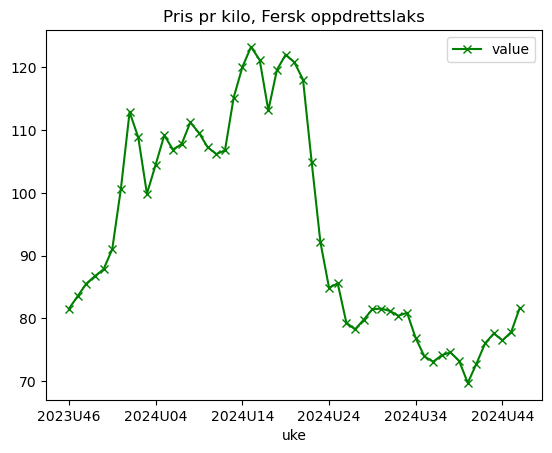

In [17]:
df_fersk.plot(x='uke', y='value', marker="x", color="g", title= "Pris pr kilo, Fersk oppdrettslaks")